In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/deepcontractor/is-that-santa-image-classification

In [ ]:
# Step by Step Approach
# 1. Import libraries
# 2. Load Data
# 3. Build Model
# 4. Train & Evaluate the Model

# Step 1: Import Libraries & Set Processing Device


In [35]:
# Libraries
import numpy as np
from tqdm import tqdm
from time import time
from PIL import Image

import torch
from torch.optim import Adam
from torch.nn import CrossEntropyLoss, Conv2d, AvgPool2d, BatchNorm2d, Dropout2d, LeakyReLU, Linear, Module
from torch.utils.data import DataLoader

from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Load Data
#### A. Data Transformer
#### B. Create Dataset
#### C. Data Loader

In [3]:
# Data Transformer
tfm = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [5]:
# Create Dataset
TRAIN_ROOT = "is that santa/train"
TEST_ROOT = "is that santa/test"

train_ds = ImageFolder(TRAIN_ROOT, transform = tfm)
test_ds = ImageFolder(TEST_ROOT, transform = tfm)

# Length of Train and Test Datasets
len_train = len(train_ds)
len_test = len(test_ds)

In [6]:
# Index Mapping
train_ds.class_to_idx

{'not-a-santa': 0, 'santa': 1}

In [7]:
# Data Loader
train_loader = DataLoader(train_ds, batch_size = 30, shuffle=True)
test_loader = DataLoader(test_ds, batch_size = 30, shuffle=True)

# Step 3: Build Model, Optimiser and Loss Function

In [28]:
# Build Model
class SantaCNN(Module):
    def __init__(self):
        super(SantaCNN, self).__init__()
        self.conv = Conv2d(in_channels=3, out_channels=8, kernel_size=(3,3), stride=1, padding=1)
        self.pool = AvgPool2d(kernel_size=(3,3), stride=1)
        self.relu = LeakyReLU()
        self.bn = BatchNorm2d(num_features=8)
        self.drop = Dropout2d(p=0.3)
        self.fc = Linear(in_features=8*126*126, out_features=2)
        
    def forward(self, X):
        output = self.conv(X)
        output = self.pool(output)
        output = self.relu(output)
        output = self.bn(output)
        output = self.drop(output)
#         print(output.shape)
        output = output.view(-1, 8*126*126)
        output = self.fc(output)
        return output

In [29]:
# Define Model and Migrate to GPU
model = SantaCNN().to(device)

In [30]:
# Optimiser
optimiser = Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)

# Loss Function
loss_fn = CrossEntropyLoss()

# Step 4: Train & Evaluate the Model

In [31]:
for epoch in range(10):
    start = time()
    train_acc = 0
    test_acc = 0

# Train
    model.train()
    with tqdm(train_loader, unit="batch") as tepoch:
        for xtrain, ytrain in tepoch:
            optimiser.zero_grad()
            xtrain = xtrain.to(device)
            train_prob = model(xtrain)
            train_prob = train_prob.cpu()
            train_loss = loss_fn(train_prob, ytrain)
            train_loss.backward()
            optimiser.step()
            # END TRAIN
            train_pred = torch.max(train_prob, 1).indices
            train_acc += int(torch.sum(train_pred == ytrain))
            
        train_epoch_accuracy = train_acc / len_train

# Evaluate
    model.eval()
    with torch.no_grad():
        for xtest, ytest in test_loader:
            xtest = xtest.to(device)
            test_prob = model(xtest)
            test_prob = test_prob.cpu()
            test_loss = loss_fn(test_prob, ytest)
            test_pred = torch.max(test_prob, 1).indices
            test_acc += int(torch.sum(test_pred == ytest))
        
        test_epoch_accuracy = test_acc / len_test
    
    end = time()
    
    diff = end - start
    
    print(f"Epoch: {epoch+1}, Time: {diff}\nTr_loss: {train_loss}, Test_loss: {test_loss}\n,Tr_acc:{train_epoch_accuracy}, Test_acc: {test_epoch_accuracy}")

100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.04batch/s]


Epoch: 1, Time: 19.869919061660767
Tr_loss: 3.7048428058624268, Test_loss: 2.3209755420684814
,Tr_acc:0.7003257328990228, Test_acc: 0.7142857142857143


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.04batch/s]


Epoch: 2, Time: 19.753128051757812
Tr_loss: 1.3533458709716797, Test_loss: 2.2372357845306396
,Tr_acc:0.7736156351791531, Test_acc: 0.8198051948051948


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.05batch/s]


Epoch: 3, Time: 19.707544326782227
Tr_loss: 2.1301608085632324, Test_loss: 1.7793744802474976
,Tr_acc:0.8371335504885994, Test_acc: 0.8441558441558441


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.06batch/s]


Epoch: 4, Time: 19.645886659622192
Tr_loss: 2.2340197563171387, Test_loss: 3.0536932945251465
,Tr_acc:0.8192182410423453, Test_acc: 0.8376623376623377


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.06batch/s]


Epoch: 5, Time: 19.57508897781372
Tr_loss: 1.0486537218093872, Test_loss: 0.10121412575244904
,Tr_acc:0.8420195439739414, Test_acc: 0.8392857142857143


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.05batch/s]


Epoch: 6, Time: 19.67534589767456
Tr_loss: 1.7595269680023193, Test_loss: 0.33966130018234253
,Tr_acc:0.8534201954397395, Test_acc: 0.8425324675324676


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.08batch/s]


Epoch: 7, Time: 19.516926527023315
Tr_loss: 1.1444238424301147, Test_loss: 3.048105001449585
,Tr_acc:0.8615635179153095, Test_acc: 0.8474025974025974


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.10batch/s]


Epoch: 8, Time: 19.451460599899292
Tr_loss: 3.0073883533477783, Test_loss: 0.9524416327476501
,Tr_acc:0.8664495114006515, Test_acc: 0.8538961038961039


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.07batch/s]


Epoch: 9, Time: 19.828624725341797
Tr_loss: 2.7535669803619385, Test_loss: 0.15681596100330353
,Tr_acc:0.8615635179153095, Test_acc: 0.8198051948051948


100%|███████████████████████████████████████████████████████████████████████████████| 21/21 [00:10<00:00,  2.06batch/s]


Epoch: 10, Time: 19.690664529800415
Tr_loss: 4.073576927185059, Test_loss: 0.32946711778640747
,Tr_acc:0.8550488599348535, Test_acc: 0.8327922077922078


# Model Performance on Samples

In [42]:
# Image Samples
sample_1 = 'is that santa/test/santa/82.Santa.jpg'
sample_2 = 'is that santa/test/santa/325.Santa.jpg'
sample_3 = 'is that santa/test/not-a-santa/110.not-a-santa.jpg'
sample_4 = 'is that santa/test/not-a-santa/189.not-a-santa.jpg'

sample_list = [sample_1,sample_2,sample_3,sample_4]

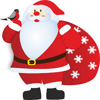

Model Pred: 1
Interpretation: Image is Santa


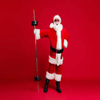

Model Pred: 1
Interpretation: Image is Santa


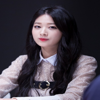

Model Pred: 0
Interpretation: Image is NOT Santa


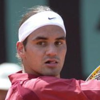

Model Pred: 0
Interpretation: Image is NOT Santa


In [43]:
# Model Performance
for img_path in sample_list:
    img = Image.open(img_path)
    display(img.resize((100, 100)))
    img_tensor = tfm(img)
    img_tensor = img_tensor[np.newaxis, :]
    img_tensor = img_tensor.to(device)
    prob = model(img_tensor)
    pred = torch.max(prob, 1).indices
    pred = pred.item()
    if pred == 0:
        print(f"Model Pred: {pred}\nInterpretation: Image is NOT Santa")
    else:
        print(f"Model Pred: {pred}\nInterpretation: Image is Santa")
        
    print("===============================================================")